## CA model

### Basic functions

In [44]:
import numpy as np
import matplotlib.pyplot as plt


# Generate grid of traders
def grid_stock_market(L, fundamentalist_probability):
    # Generate an L by L array with random values between 0 and 1
    random_grid = np.random.rand(L, L)
    # Convert values to 0 or 1 based on the probability of a fundamentalist
    result_grid = (random_grid > fundamentalist_probability).astype(int)
    return result_grid


# Required for all levels
# Set up transition table
def transition_table(array):
    return np.mean(np.array(array))

# Transaction quantity
def calculation_transaction_quantity(transactions, L):
    total_transactions = 0
    for row in range(L):
        for column in range(L):
            total_transactions = total_transactions + transactions[row, column]
    return total_transactions

# Price function 
def price_function(previous_price, sensitivity_contant, L, transaction_quantity):
    price = previous_price + sensitivity_contant*transaction_quantity/(L**2)
    if price < 0 :
        price = 0
    return price

# Set up function for state changes (Level 1)
def next_state(trader_grid, cur_state, price, fundamental_value, L):
    
    transaction_quantity = np.zeros(np.shape(cur_state))
    assert (L, L) == np.shape(cur_state)
    
    for row_index in range(L):
        for column_index in range(L):
            trader_type = trader_grid[row_index, column_index]
            if trader_type == 0:
                transaction_quantity[row_index,column_index] = fundamental_value - price
            else: 
                transaction_quantity[row_index,column_index] = transition_table([cur_state[(row_index-1)%L, column_index%L], cur_state[(row_index+1)%L, column_index%L], cur_state[(row_index)%L, (column_index-1)%L], cur_state[(row_index)%L, (column_index+1)%L], cur_state[(row_index-1)%L, (column_index-1)%L], cur_state[(row_index-1)%L, (column_index+1)%L], cur_state[(row_index+1)%L, (column_index-1)%L],cur_state[(row_index+1)%L, (column_index+1)%L]])
    
    return transaction_quantity

# Expansion for function of level 2
def news_influence(trader_type, parameters, phi_fu, phi_im):
    c_fundamentalist, c_imitator = parameters
    assert (trader_type == 0 or trader_type == 1)
    if trader_type == 0:
        factor_news = 1 + c_fundamentalist*phi_fu
    elif trader_type == 1: 
        factor_news = 1 + c_imitator*phi_im
    return factor_news
def next_state_Level_2(trader_grid, cur_state, price_list, fundamental_value, news_relevance, L):
    
    transaction_quantity = np.zeros(np.shape(cur_state))
    assert (L, L) == np.shape(cur_state)
    phi_fu = np.random.normal(0,1)
    phi_im = np.random.normal(0,1)
    for row_index in range(L):
        for column_index in range(L):
            trader_type = trader_grid[row_index, column_index]
            news = news_influence(trader_type, news_relevance,phi_fu, phi_im)
            
            if trader_type == 0:
                price = price_list[-1]
                transaction_quantity[row_index,column_index] = (fundamental_value*news - price)
            else: 
                transaction_quantity[row_index,column_index] = news*transition_table([cur_state[(row_index-1)%L, column_index%L], cur_state[(row_index+1)%L, column_index%L], cur_state[(row_index)%L, (column_index-1)%L], cur_state[(row_index)%L, (column_index+1)%L], cur_state[(row_index-1)%L, (column_index-1)%L], cur_state[(row_index-1)%L, (column_index+1)%L], cur_state[(row_index+1)%L, (column_index-1)%L],cur_state[(row_index+1)%L, (column_index+1)%L]])
    
    return transaction_quantity

# Expansion for level 3
def price_fluctuations(k, prices):
    k = min(k, len(prices))
    P_bar = sum(prices[-k:]) / k  # Calculate the average price
    Lt = sum(abs(P_i - P_bar) for P_i in prices[-k:]) / P_bar / k
    return Lt
#    prices_considered = []
#    if len(price_list) >= period_length:
 #       for idx in range(len(price_list) - (period_length), len(price_list)):
 #           prices_considered.append(price_list[idx])
  #      price_fluctuation = 0
  #     for idx in range(period_length):
   #         assert period_length == len(prices_considered)
    #        price_fluctuation = price_fluctuation + 1/period_length * abs(prices_considered[idx]-(len(prices_considered)/period_length)*np.mean(prices_considered))/np.mean(prices_considered)
            
    #else:
     #   for idx in range(len(price_list)):
      #      prices_considered.append(price_list[idx])
       # price_fluctuation = 0
        #for idx in range(len(price_list)):
         #   price_fluctuation = price_fluctuation + 1/(len(price_list)+1) * abs(prices_considered[idx] - np.mean(prices_considered))/np.mean(prices_considered)
   
def trading_activity_function(Cl, Lt, Lm):
    """
    Calculate the current trading activity M^t.

    :param Lt: Current price volatility level
    :param Cl: Parameter
    :param Lm: Threshold
    :return: Current trading activity level
    """
    # The lower bound of Mt is 0.05
    if Lt <= Lm:
        return max(Cl * Lt, 0.05)
    else:
        return max(Cl * (-Lt + 2 * Lm), 0.05)
#def trading_activity_function(constant, price_fluctuation, stock_favorability):
#   trade_activity = 0
 #   if price_fluctuation <= stock_favorability:
  #      trade_activity = constant*price_fluctuation
   # elif price_fluctuation > stock_favorability:
    #    trade_activity = constant*(-price_fluctuation + 2*stock_favorability)
     
   # trade = trade_activity
    #if trade_activity < 0.05:
     #   trade = 0.05
    #else: 
     #   trade = trade_activity
    #return trade

def next_state_Level_3(trader_grid, cur_state, price_list, fundamental_value, news_relevance, L, trades):
    
    transaction_quantity = np.zeros(np.shape(cur_state))
    assert (L, L) == np.shape(cur_state)
    phi_fu = np.random.normal(0,1)
    phi_im = np.random.normal(0,1)
    for row_index in range(L):
        for column_index in range(L):
            trader_type = trader_grid[row_index, column_index]
            news = news_influence(trader_type, news_relevance,phi_fu, phi_im)
            
            if trader_type == 0:
                price = price_list[-1]
                transaction_quantity[row_index,column_index] = (fundamental_value*news - price) * trades
            else: 
                transaction_quantity[row_index,column_index] = trades*news*transition_table([cur_state[(row_index-1)%L, column_index%L], cur_state[(row_index+1)%L, column_index%L], cur_state[(row_index)%L, (column_index-1)%L], cur_state[(row_index)%L, (column_index+1)%L], cur_state[(row_index-1)%L, (column_index-1)%L], cur_state[(row_index-1)%L, (column_index+1)%L], cur_state[(row_index+1)%L, (column_index-1)%L],cur_state[(row_index+1)%L, (column_index+1)%L]])
    
    return transaction_quantity

### Level 1

In [17]:
def Level_1_simulation(trader_grid, initial_price, fundamental_value, time, L, sensitivity_contant):
    # initialize price list for market
    price_list = [initial_price]
    # initialize transaction quantities. Note that this implies at t=0 we initialize with imitators not trading and fundamentalists changing to the updated price values
    transaction_quantities = next_state(trader_grid, np.zeros((L,L)), price_list[-1], fundamental_value, L)
    transactions = [transaction_quantities]
    for t in range(time):
        transactions.append(next_state(trader_grid, transactions[-1], price_list[-1], fundamental_value, L))
        trans_quantity = calculation_transaction_quantity(transactions[-1], L)
        price_list.append(price_function(price_list[-1],sensitivity_contant,L, trans_quantity))
    return np.array(transactions), np.array(price_list)


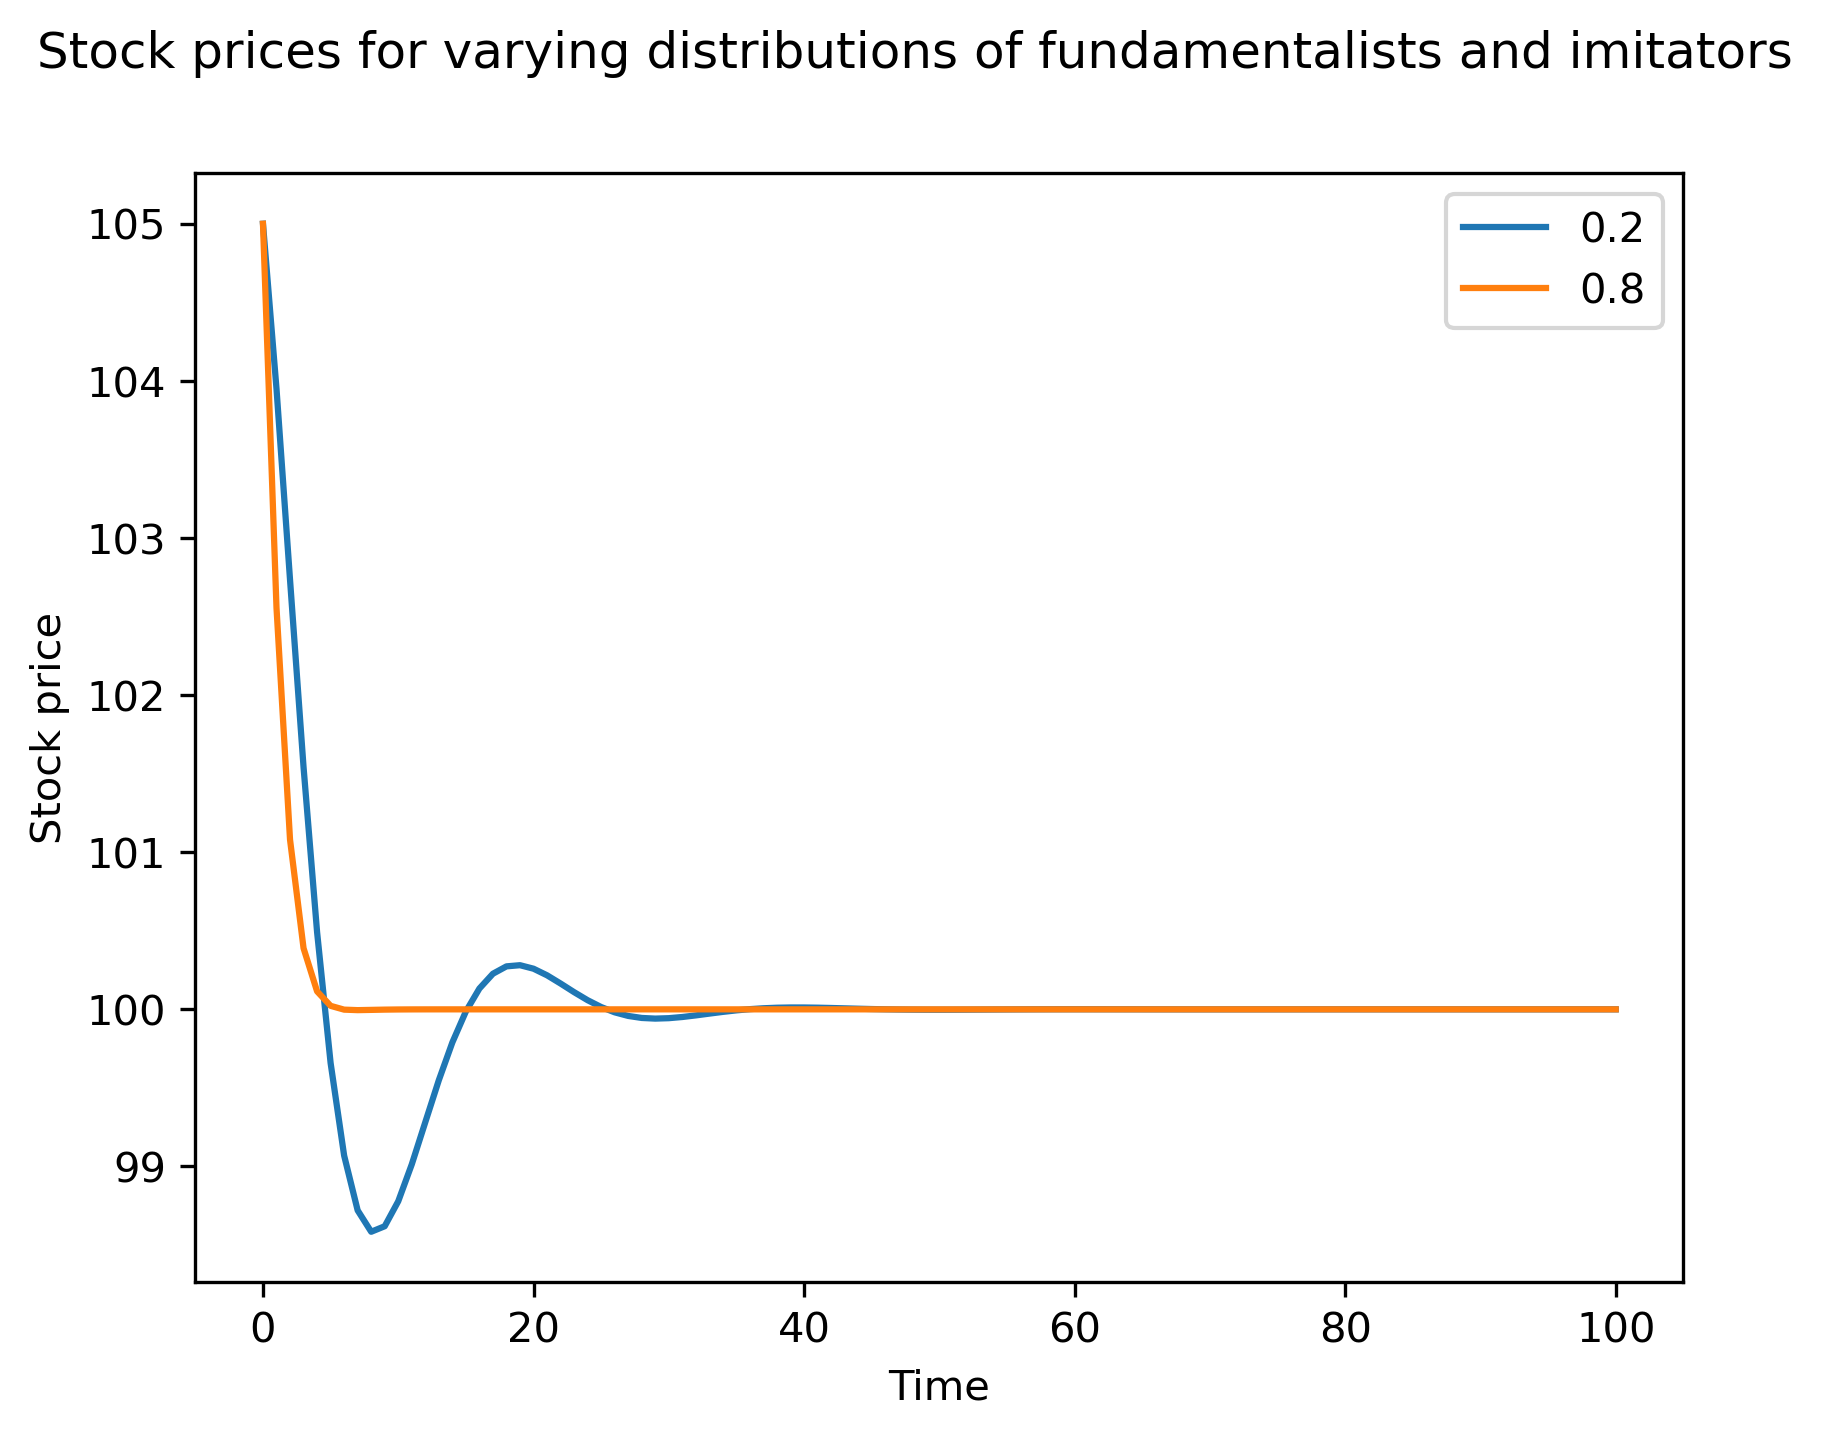

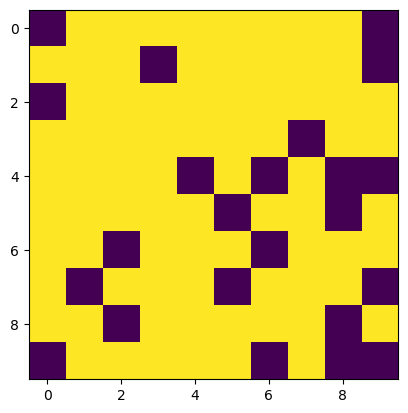

In [18]:
# Verification plots for Level 1 model
fundamentalists_probabilities = [0.2, 0.8]
L = 10
fundamental_value = 100
initial_price = 105
time = 100
constant = 0.5

plt.figure(dpi = 300)
for p in fundamentalists_probabilities:
    trader_grid = grid_stock_market(L, p)
    prices = Level_1_simulation(trader_grid, initial_price, fundamental_value, time, L, constant)
    plt.plot(np.arange(time + 1), prices[1], label = p)
plt.suptitle('Stock prices for varying distributions of fundamentalists and imitators')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()
plt.close()
    

trader_grid_presentation = grid_stock_market(L, 0.2)
# Plot trader type distribution
im = plt.imshow(trader_grid_presentation)
plt.show()

### Level 3 model

In [45]:
def Level_3_simulation(trader_grid, initial_price, fundamental_value, time, L, sensitivity_contant, constant_trading, news_relevance, stock_favorability, period_length):
    # initialize price list for market
    price_list = [initial_price]
    price_fluctuation = price_fluctuations(period_length, price_list)
    price_fluctuation_list = [price_fluctuation]
    trades = trading_activity_function(constant_trading, price_fluctuation, stock_favorability)
    trades_list = [trades]
    
    # initialize transaction quantities. Note that this implies at t=0 we initialize with imitators not trading and fundamentalists changing to the updated price values
    transaction_quantities = next_state_Level_3(trader_grid, np.zeros((L,L)), price_list, fundamental_value, news_relevance, L, trades)
    transactions = [transaction_quantities]
    for t in range(time):
        price_fluctuation = price_fluctuations(period_length, price_list)
        price_fluctuation_list.append(price_fluctuation)
        trades = trading_activity_function(constant_trading, price_fluctuation, stock_favorability)
        trades_list.append(trades)
        
        transactions.append(next_state_Level_3(trader_grid, transactions[-1], price_list, fundamental_value, news_relevance, L, trades))
        trans_quantity = calculation_transaction_quantity(transactions[-1], L)
        price_list.append(price_function(price_list[-1],sensitivity_contant,L, trans_quantity))
    return np.array(transactions), np.array(price_list), np.array(price_fluctuation_list), np.array(trades_list)


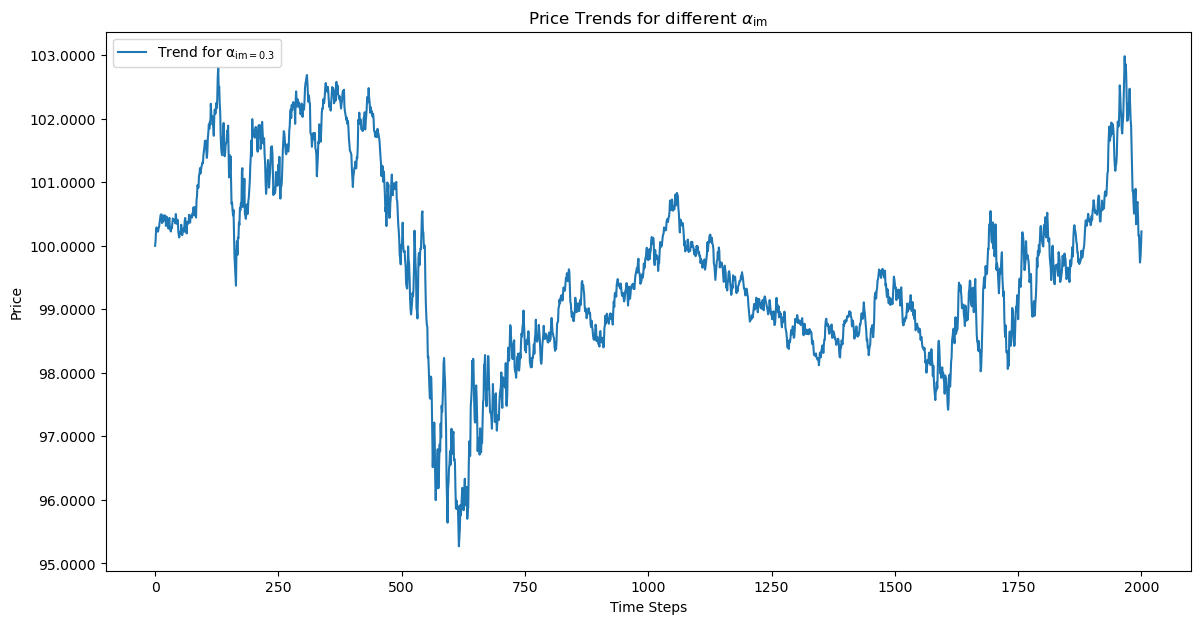

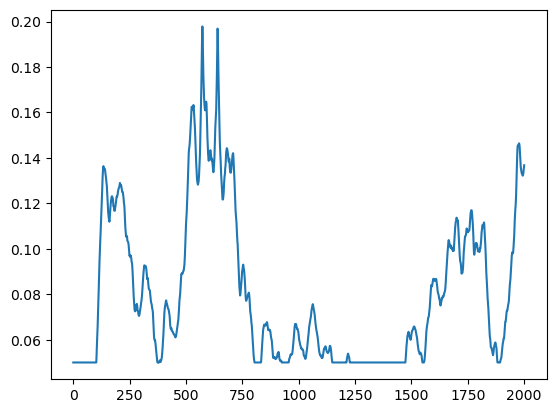

In [57]:
L = 100
fundamental_value = 100
initial_price = 100
time = 2000
constant = 0.3
trader_grid = grid_stock_market(L, 0.3)
constant_trading = 20
news_relevance = [0.2, 0.7]
stock = 0.01
period = 100


resultS = Level_3_simulation(trader_grid, initial_price, fundamental_value, time, L, constant, constant_trading, news_relevance, stock, period)
from matplotlib.ticker import FormatStrFormatter
a = {0.3:resultS[1]}
plt.figure(figsize=(14, 7))
for key, values in a.items():
    plt.plot(values, label=r'Trend for $\mathrm{\alpha_{im=' + str(key) + '}}$')
plt.title(r'Price Trends for different $\alpha_{\mathrm{im}}$')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
plt.legend()
plt.show()

plt.figure(2)
plt.plot(np.arange(time+1), resultS[3])
plt.show()
plt.close()


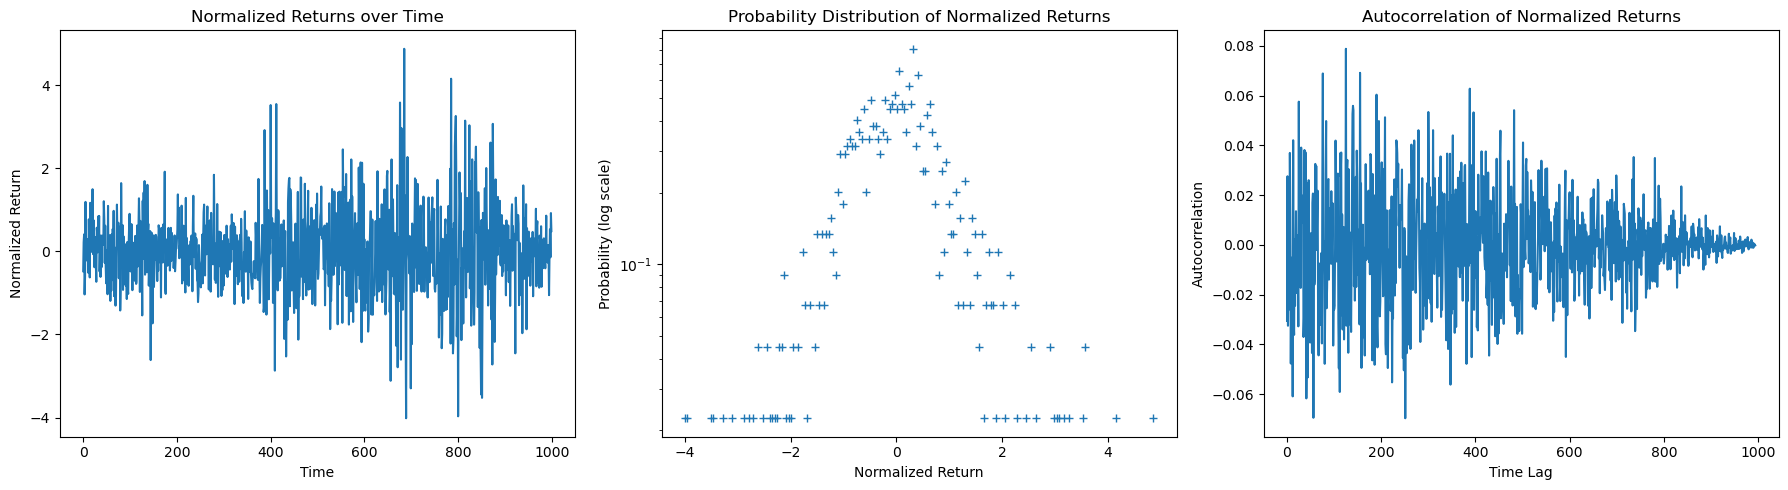

In [51]:
price_history = a[0.3]
returns = np.diff(price_history)
mean_return = np.mean(returns)
std_return = np.std(returns)
normalized_returns = [(ret - mean_return) / std_return for ret in returns]

# Calculate the distribution of normalized returns
# Use more bins for higher resolution in the histogram
hist, bins = np.histogram(normalized_returns, bins=200, density=True) 
# hist - The number of intervals divided into
# bins - The boarder of the intervals
bin_centers = 0.5 * (bins[1:] + bins[:-1]) 

# Autocorrelation
autocorr_returns = np.correlate(normalized_returns, normalized_returns, mode='full')
autocorr_returns = autocorr_returns[autocorr_returns.size // 2:]
autocorr_returns /= autocorr_returns[0]
# Plot the figures
plt.figure(figsize=(18, 5))

# Plot (a) Time series of normalized returns
plt.subplot(1, 3, 1)
plt.plot(normalized_returns)
plt.xlabel('Time')
plt.ylabel('Normalized Return')
plt.title('Normalized Returns over Time')

# Plot (b) Distribution of normalized returns with only y-axis in log scale
plt.subplot(1, 3, 2)
plt.semilogy(bin_centers, hist, linestyle='None', marker='+')
plt.xlabel('Normalized Return')
plt.ylabel('Probability (log scale)')
plt.title('Probability Distribution of Normalized Returns')

# Plot (c) Autocorrelation function of returns
plt.subplot(1, 3, 3)
plt.plot(autocorr_returns[5:])
plt.xlabel('Time Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Normalized Returns')

plt.tight_layout()
plt.show()